In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import SelectFromModel
from sklearn.naive_bayes import MultinomialNB
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('/Users/anishdulla/Desktop/YPA.csv')

In [3]:
df

,Music,Slow songs or fast songs,Dance,Folk,Country,Classical music,Musical,Pop,Rock,Metal or Hardrock,...,Age,Height,Weight,Number of siblings,Gender,Left - right handed,Education,Only child,Village - town,House - block of flats
0,5.0,3.0,2.0,1.0,2.0,2.0,1.0,5.0,5.0,1.0,...,20.0,163.0,48.0,1.0,female,right handed,college/bachelor degree,no,village,block of flats
1,4.0,4.0,2.0,1.0,1.0,1.0,2.0,3.0,5.0,4.0,...,19.0,163.0,58.0,2.0,female,right handed,college/bachelor degree,no,city,block of flats
2,5.0,5.0,2.0,2.0,3.0,4.0,5.0,3.0,5.0,3.0,...,20.0,176.0,67.0,2.0,female,right handed,secondary school,no,city,block of flats
3,5.0,3.0,2.0,1.0,1.0,1.0,1.0,2.0,2.0,1.0,...,22.0,172.0,59.0,1.0,female,right handed,college/bachelor degree,yes,city,house/bungalow
4,5.0,3.0,4.0,3.0,2.0,4.0,3.0,5.0,3.0,1.0,...,20.0,170.0,59.0,1.0,female,right handed,secondary school,no,village,house/bungalow
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1005,5.0,2.0,5.0,2.0,2.0,5.0,4.0,4.0,4.0,3.0,...,20.0,164.0,57.0,1.0,female,right handed,secondary school,no,city,house/bungalow
1006,4.0,4.0,5.0,1.0,3.0,4.0,1.0,4.0,1.0,1.0,...,27.0,183.0,80.0,5.0,male,left handed,masters degree,no,village,house/bungalow
1007,4.0,3.0,1.0,1.0,2.0,2.0,2.0,3.0,4.0,1.0,...,18.0,173.0,75.0,0.0,female,right handed,secondary school,yes,city,block of flats
1008,5.0,3.0,3.0,3.0,1.0,3.0,1.0,3.0,4.0,1.0,...,25.0,173.0,58.0,1.0,female,right handed,college/bachelor degree,no,city,block of flats


In [4]:
df.dtypes

Music                       float64
Slow songs or fast songs    float64
Dance                       float64
Folk                        float64
Country                     float64
                             ...   
Left - right handed          object
Education                    object
Only child                   object
Village - town               object
House - block of flats       object
Length: 150, dtype: object

In [5]:
df = df.rename(columns={'Internet usage': 'Internet2'})
df = df.rename(columns={'Left - right handed': 'Orientation'})
df = df.rename(columns={'Village - town': 'Housing1'})
df = df.rename(columns={'House - block of flats': 'Housing2'})
df = df.rename(columns={'Only child': 'Child'})

In [6]:
SmokingDummies = pd.get_dummies(df.Smoking)
PuncutalityDummies = pd.get_dummies(df.Punctuality)
LyingDummies = pd.get_dummies(df.Lying)
Internet2Dummies = pd.get_dummies(df.Internet2)
GenderDummies = pd.get_dummies(df.Gender)
OrientationDummies = pd.get_dummies(df.Orientation)
EducationDummies = pd.get_dummies(df.Education)
ChildDummies = pd.get_dummies(df.Child)
Housing1Dummies = pd.get_dummies(df.Housing1)
Housing2Dummies = pd.get_dummies(df.Housing2)

In [7]:
merged = pd.concat([df, SmokingDummies, PuncutalityDummies, LyingDummies, Internet2Dummies, GenderDummies, EducationDummies, OrientationDummies, ChildDummies, Housing1Dummies, Housing2Dummies], axis='columns')

In [8]:
merged

,Music,Slow songs or fast songs,Dance,Folk,Country,Classical music,Musical,Pop,Rock,Metal or Hardrock,...,primary school,secondary school,left handed,right handed,no,yes,city,village,block of flats,house/bungalow
0,5.0,3.0,2.0,1.0,2.0,2.0,1.0,5.0,5.0,1.0,...,0,0,0,1,1,0,0,1,1,0
1,4.0,4.0,2.0,1.0,1.0,1.0,2.0,3.0,5.0,4.0,...,0,0,0,1,1,0,1,0,1,0
2,5.0,5.0,2.0,2.0,3.0,4.0,5.0,3.0,5.0,3.0,...,0,1,0,1,1,0,1,0,1,0
3,5.0,3.0,2.0,1.0,1.0,1.0,1.0,2.0,2.0,1.0,...,0,0,0,1,0,1,1,0,0,1
4,5.0,3.0,4.0,3.0,2.0,4.0,3.0,5.0,3.0,1.0,...,0,1,0,1,1,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1005,5.0,2.0,5.0,2.0,2.0,5.0,4.0,4.0,4.0,3.0,...,0,1,0,1,1,0,1,0,0,1
1006,4.0,4.0,5.0,1.0,3.0,4.0,1.0,4.0,1.0,1.0,...,0,0,1,0,1,0,0,1,0,1
1007,4.0,3.0,1.0,1.0,2.0,2.0,2.0,3.0,4.0,1.0,...,0,1,0,1,0,1,1,0,1,0
1008,5.0,3.0,3.0,3.0,1.0,3.0,1.0,3.0,4.0,1.0,...,0,0,0,1,1,0,1,0,1,0


In [9]:
final = merged.drop(['Smoking', 'Lying', 'Punctuality', 'Internet2', 'Gender', 'Orientation', 'Education', 'Child', 'Housing1', 'Housing2', 'tried smoking', 'i am often early', 'never', 'most of the day', 'female', 'left handed', 'primary school', 'no', 'village', 'block of flats'], axis='columns')

In [10]:
final

,Music,Slow songs or fast songs,Dance,Folk,Country,Classical music,Musical,Pop,Rock,Metal or Hardrock,...,male,college/bachelor degree,currently a primary school pupil,doctorate degree,masters degree,secondary school,right handed,yes,city,house/bungalow
0,5.0,3.0,2.0,1.0,2.0,2.0,1.0,5.0,5.0,1.0,...,0,1,0,0,0,0,1,0,0,0
1,4.0,4.0,2.0,1.0,1.0,1.0,2.0,3.0,5.0,4.0,...,0,1,0,0,0,0,1,0,1,0
2,5.0,5.0,2.0,2.0,3.0,4.0,5.0,3.0,5.0,3.0,...,0,0,0,0,0,1,1,0,1,0
3,5.0,3.0,2.0,1.0,1.0,1.0,1.0,2.0,2.0,1.0,...,0,1,0,0,0,0,1,1,1,1
4,5.0,3.0,4.0,3.0,2.0,4.0,3.0,5.0,3.0,1.0,...,0,0,0,0,0,1,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1005,5.0,2.0,5.0,2.0,2.0,5.0,4.0,4.0,4.0,3.0,...,0,0,0,0,0,1,1,0,1,1
1006,4.0,4.0,5.0,1.0,3.0,4.0,1.0,4.0,1.0,1.0,...,1,0,0,0,1,0,0,0,0,1
1007,4.0,3.0,1.0,1.0,2.0,2.0,2.0,3.0,4.0,1.0,...,0,0,0,0,0,1,1,1,1,0
1008,5.0,3.0,3.0,3.0,1.0,3.0,1.0,3.0,4.0,1.0,...,0,1,0,0,0,0,1,0,1,0


In [11]:
final = final.dropna()

In [12]:
final

,Music,Slow songs or fast songs,Dance,Folk,Country,Classical music,Musical,Pop,Rock,Metal or Hardrock,...,male,college/bachelor degree,currently a primary school pupil,doctorate degree,masters degree,secondary school,right handed,yes,city,house/bungalow
0,5.0,3.0,2.0,1.0,2.0,2.0,1.0,5.0,5.0,1.0,...,0,1,0,0,0,0,1,0,0,0
1,4.0,4.0,2.0,1.0,1.0,1.0,2.0,3.0,5.0,4.0,...,0,1,0,0,0,0,1,0,1,0
2,5.0,5.0,2.0,2.0,3.0,4.0,5.0,3.0,5.0,3.0,...,0,0,0,0,0,1,1,0,1,0
4,5.0,3.0,4.0,3.0,2.0,4.0,3.0,5.0,3.0,1.0,...,0,0,0,0,0,1,1,0,0,1
5,5.0,3.0,2.0,3.0,2.0,3.0,3.0,2.0,5.0,5.0,...,1,0,0,0,0,1,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1004,5.0,3.0,4.0,1.0,2.0,3.0,2.0,3.0,3.0,4.0,...,1,0,0,0,0,1,1,0,1,0
1005,5.0,2.0,5.0,2.0,2.0,5.0,4.0,4.0,4.0,3.0,...,0,0,0,0,0,1,1,0,1,1
1007,4.0,3.0,1.0,1.0,2.0,2.0,2.0,3.0,4.0,1.0,...,0,0,0,0,0,1,1,1,1,0
1008,5.0,3.0,3.0,3.0,1.0,3.0,1.0,3.0,4.0,1.0,...,0,1,0,0,0,0,1,0,1,0


In [13]:
y = final["Alcohol"]
X = final.drop(["Alcohol"], axis=1)

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=96)

In [15]:
X_train.shape

(548, 160)

In [16]:
X_test.shape

(137, 160)

In [17]:
y_train.shape

(548,)

In [18]:
y_test.shape

(137,)

In [19]:
selector = SelectFromModel(estimator=MultinomialNB()).fit(X_train, y_train)

In [20]:
X_train_new = selector.transform(X_train)

In [21]:
X_test_new = selector.transform(X_test)

In [22]:
X_train_new.shape

(548, 34)

In [23]:
X_test_new.shape

(137, 34)

In [24]:
model = MultinomialNB()

In [25]:
model.fit(X_train_new, y_train)

MultinomialNB()

In [26]:
model.score(X_test_new, y_test)

0.708029197080292

In [27]:
from sklearn.metrics import plot_confusion_matrix

In [28]:
target_labels = final.Alcohol.unique()

In [29]:
target_labels

array(['drink a lot', 'social drinker', 'never'], dtype=object)

In [30]:
import matplotlib.pyplot as plt

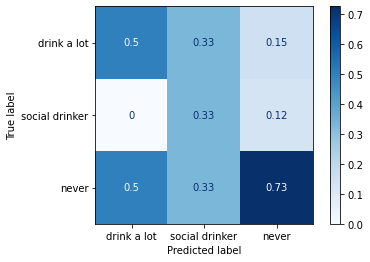

In [31]:
disp = plot_confusion_matrix(model, X_test_new, y_test, display_labels=target_labels, cmap=plt.cm.Blues, normalize='pred')